# NLP. Task №1. Spam Detection

by Maria Ismailova

The task:

Classify news to one of 5 categories based on text.

- Download sms-spam dataset https://archive.ics.uci.edu/ml/datasets/sms+spam+collection
- Choose and argument metric for quality
- Code «by a hands» naive bayes for spam detection task
- Choose a measure of a test's accuracy and argument your choice
- Perform 5-fold validation for this task
- Compare your results with sklearn naive_bayes

The SMS Spam Collection v.1 (hereafter the corpus) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

While completing this task I used:
- NLP lectures
- several Internet-based articles
- some examples of coding

# Data inspection

In [134]:
# loading the libraries

import numpy as np
import pandas as pd
import re
import scipy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download("punkt")  
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariaismailova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariaismailova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [135]:
# loading the sms dataset

df_sms = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['tag', 'text'])

In [136]:
# inspecting the data

df_sms.head(10)

,tag,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [137]:
# inspecting the data

df_sms.tail(10)

,tag,text
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [138]:
# inspecting the data

df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
tag     5572 non-null object
text    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [139]:
# inspecting the data

df_sms.describe()

,tag,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [140]:
# inspecting the data

df_sms['tag'].value_counts()

ham     4825
spam     747
Name: tag, dtype: int64

In [141]:
# relative frequency

df_sms['tag'].value_counts(normalize = True)

ham     0.865937
spam    0.134063
Name: tag, dtype: float64

In [142]:
# adding a column encoding the category as an integer

df_sms['tag_id'] = df_sms['tag'].factorize()[0]

In [143]:
# checking data with new column

df_sms.head(5)

,tag,text,tag_id
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [144]:
# checking data with new column

df_sms.tail(5)

,tag,text,tag_id
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0
5571,ham,Rofl. Its true to its name,0


'Distribution of tags of text'

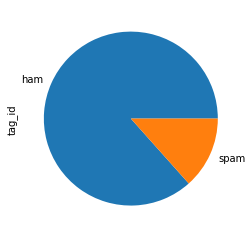

In [145]:
# graph of distribution of categories

df_sms.groupby('tag').tag_id.count().plot.pie()
('Distribution of tags of text')

# Text representation

In [146]:
# removing punctuation
df_sms ['text'] = df_sms['text'].str.replace('[^\w\s]', '')

# converting to the lower case
df_sms ['text'] = df_sms['text'].map(lambda x: x.lower())

# removing digits
df_sms ['text'] = df_sms['text'].str.replace('[0-9]', '')

# removing stopwords
stop = stopwords.words('english')
df_sms['text'] = df_sms['text'].replace(stop, '')

# removing empty Phrases
df_sms [df_sms['text'].str.len() == 0].head()

,tag,text,tag_id
1612,ham,,0


In [147]:
# tokenizing and stemming

df_sms['text'] = df_sms.text.apply(nltk.word_tokenize)
stemmer = PorterStemmer()
df_sms['text'] = df_sms['text'].apply(lambda x: [stemmer.stem(y) for y in x])

In [148]:
df_sms['text'] = df_sms['text'].apply(lambda x: ' '.join(x))

In [149]:
# splitting the data on train and test samples

X_train, x_test, Y_train, y_test = train_test_split(df_sms['text'], df_sms['tag_id'], test_size = 0.2)

In [150]:
# checking samples' length

len(X_train), len(x_test)

(4457, 1115)

In [151]:
# using count vectorizer

vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
x_test_vect = vectorizer.transform(x_test)

# Sklearn Naive Bayes

In [152]:
# building multinomial naive bayes classifier

NB = MultinomialNB().fit(X_train_vect, Y_train)

In [153]:
# NB testing

NB_test = NB.predict(x_test_vect)

In [154]:
# classification report for naive bayes

print(classification_report(y_test, NB.predict(x_test_vect)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       958
           1       0.95      0.90      0.93       157

   micro avg       0.98      0.98      0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [156]:
# accuracy score for naive bayes

print(accuracy_score(y_test, NB_test))

0.9802690582959641


# NB "by hands"

**Bayes' theorem: P(A|B) = P(B|A)*P(A)/P(B)**

In [157]:
# counting number of spam messages

spams = Y_train.value_counts()[1]
print(spams)

590


In [158]:
# counting number of ham messages

hams = Y_train.value_counts()[0]
print(hams)

3867


In [159]:
# sum of spams and hams

total = spams + hams
print(total)

4457


In [160]:
# counting probabality that message is spam

p_spams = spams/total
print(p_spams)

0.13237603769351583


In [161]:
# counting probabality that message is ham

p_hams = hams/total
print(p_hams)

0.8676239623064842


In [162]:
# counting probability for spam

indices = np.where(Y_train == 1)[0]
spam = X_train_vect.tocsr()[indices,:]

freq_spam = spam.toarray().sum(axis = 0) + 1
prob_spam = freq_spam/(sum(freq_spam))

In [163]:
# counting probability for spam

indices = np.where(Y_train == 0)[0]
ham = X_train_vect.tocsr()[indices,:]

freq_ham = ham.toarray().sum(axis = 0) + 1
prob_ham = freq_ham/(sum(freq_ham))

In [164]:
# defining a function

def tag(arr):
    
    P_spam = np.log(p_spams)
    P_ham = np.log(p_hams)
    arr = scipy.sparse.find(arr)
    
    for i in range(len(arr[1])):
        P_spam = P_spam + np.log(prob_spam[arr[1][i]]) * arr[2][i]
        P_ham = P_ham + np.log(prob_ham[arr[1][i]]) * arr[2][i]
        

    if P_ham >= P_spam:
        return 0
    else:
        return 1

res = []
for i in x_test_vect:
    res.append(tag(i))

In [165]:
# classification report for naive bayes "by hands"

print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       958
           1       0.95      0.90      0.93       157

   micro avg       0.98      0.98      0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [166]:
# accuracy score for naive bayes "by hands"

print(accuracy_score(y_test, res))

0.9802690582959641


# Cross-validation

In [167]:
scores = cross_validate(estimator = NB, X = X_train_vect, y = Y_train, cv = 5, scoring= 'f1')
print('F1 scores: ', scores['test_score'])
print('Average F1 score: ', np.mean(scores['test_score']))

F1 scores:  [0.88333333 0.90983607 0.87394958 0.888      0.90082645]
Average F1 score:  0.8911890850040056


# Comparison

F1-score is a good candidate for a formal classifier quality assessment metric. It reduces to one number two other fundamental metrics: precision and recall. It also performs well with sample imbalance problems. So I will compare weighted average f1-score for two models:

F1-score for sklearn naive bayes = 0,98

F1-score for naive bayes "by hands" = 0,98

Despite performing in the same way, cross-validation results show us, that we should deal with an existing problem of sample imbalance.